In [200]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import ensemble  #for random forest
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

In [201]:
#import the three data tables - employees.csv, headers.csv, public_schools.csv
#and merge them by county,district and school codes
employees_df = pd.read_csv("employees.csv")
headers_df = pd.read_csv("headers.csv")
schools_df = pd.read_csv("public_schools.csv")
print employees_df.shape, headers_df.shape, schools_df.shape

(144158, 20) (2461, 7) (2662, 49)


In [202]:
#clean up some of the values so that they can be joined with the school headers data:
#employee text values do not have commas or apostrophes so remove them from the school data values
headers_df.school = headers_df.school.str.replace("'",'')
headers_df.district = headers_df.district.str.replace("'",'')
schools_df.school_name = schools_df.school_name.str.replace("'",'')
schools_df.district_name = schools_df.district_name.str.replace("'",'')

headers_df.school = headers_df.school.str.replace(",",'')
headers_df.district = headers_df.district.str.replace(",",'')
schools_df.school_name = schools_df.school_name.str.replace(",",'')
schools_df.district_name = schools_df.district_name.str.replace(",",'')

#correct the fact that 7s appeared as CE in the employee file
employees_df.school = employees_df.school.str.replace('RAHWAY CETH','RAHWAY 7TH')
employees_df.school = employees_df.school.str.replace('ROOSEVELT SCHOOL #CE','ROOSEVELT SCHOOL #7')
employees_df.school = employees_df.school.str.replace('ANTONIA PANTOJA SCHOOL NO. 2CE','ANTONIA PANTOJA SCHOOL NO. 27')
employees_df.school = employees_df.school.str.replace('#1CE','#17')
employees_df.school = employees_df.school.str.replace('SCHOOL 2CE','SCHOOL 27')
employees_df.school = employees_df.school.str.replace('ULYSSES S. GRANT SCHOOL # CE','ULYSSES S. GRANT SCHOOL # 7')
employees_df.school = employees_df.school.str.replace('SCHOOL CE','SCHOOL 7')
employees_df.school = employees_df.school.str.replace('TERENCE C. REILLY SCHOOL # CE','TERENCE C. REILLY SCHOOL # 7')
employees_df.school = employees_df.school.str.replace('SCHOOL # 1CE','SCHOOL # 17')
employees_df.school = employees_df.school.str.replace('BELLEVILLE PSCE','BELLEVILLE PS7')

#correct various mismatches in the data:
employees_df.district = employees_df.district.str.replace(' VC',' VOCATIONAL')

headers_df.school.loc[(headers_df.school == 'LINCOLN ELEMENTARY SCHOOL') & (headers_df.district == 'KEARNY TOWN')] \
                      = 'LINCOLN MIDDLE SCHOOL'
headers_df.school.loc[(headers_df.school == 'SCHOOL OF SCIENCE TECHNOLOGY ENGG & MATHEMATICS') & \
                     (headers_df['district'] == 'PATERSON CITY')] \
                    = 'SCHOOL OF SCIENCE TECHNOLOGY ENGINEERING AND MATHEMATICS'

schools_df.district_code.loc[(schools_df['school_name'] == 'LAMBERTVILLE PUBLIC SCHOOL')] = 2530
schools_df.school_code.loc[(schools_df['school_name'] == 'LAMBERTVILLE PUBLIC SCHOOL')]= 50
schools_df.school_code.loc[(schools_df['school_name'] == 'HENRY L. BONSALL FAMILY SCHOOL')] = 100
schools_df.school_code.loc[(schools_df['school_name'] == 'FRANCIS X. MCGRAW ELEMENTARY')] = 230
schools_df.school_code.loc[(schools_df['school_name'] == 'RAFAEL CORDERO MOLINA ELEMENTARY SCHOOL')] = 250
schools_df.school_code.loc[(schools_df['school_name'] == 'JOHN GREENLEAF WHITTIER FAMILY SCHOOL')] = 340
schools_df.district_code.loc[(schools_df['school_name'] == 'SOUTH HUNTERDON HIGH SCHOOL')] = 4890
schools_df.district_code.loc[(schools_df['school_name'] == 'STOCKTON BOROUGH SCHOOL')] = 5050
schools_df.school_code.loc[(schools_df['school_name'] == 'STOCKTON BOROUGH SCHOOL')]  = 50

    
headers_df = pd.merge(headers_df, schools_df, how='left', on=['county_code','district_code', 'school_code'])


remaining = pd.DataFrame([
   ['GRETTA R. OSTROVSKY MIDDLE SCHOOL',    -74.08466,     40.84146],
   ['JR/SR HIGH SCHOOL',    -74.81260,     40.04495],
   ['EAST CAMDEN MIDDLE SCHOOL',    -75.12285,     39.95576],
   ['PYNE POYNT MIDDLE SCHOOL',    -75.12696,    39.93595],
   ['STOCKTON BOROUGH SCHOOL DISTRICT',    -74.49987,     40.16706],
   ['WEST AMWELL TOWNSHIP',   -74.11532,     40.91506],
   ['MONUMENT ELEMENTARY SCHOOL',   -74.71268,     40.26977],
   ['AUDREY W. CLARK ELEMENTARY SCHOOL',    -73.98236,     40.30576],
   ['BOUND BROOK ELEMENTARY SCHOOL',    -74.47620,     40.58596],
   ['VISIONS ACADEMY CHARTER HIGH SCHOOL',    -74.49987,     40.16706],
   ['CENTRAL JERSEY ARTS CHARTER SCHOOL',   -75.50865,     39.66265],
   ['ARTHUR STANLICK ELEMENTARY SCHOOL', -74.559507, 41.002672],
   ['BRAGG ELEMENTARY SCHOOL', -74.687645, 40.776312],
   ['DICKERSON ELEMENTARY SCHOOL', -74.687645, 40.776312],     
   ['GALLOWAY COMMUNITY CHARTER SCHOOL',    -74.49987,     40.16706]])
remaining.columns = ['school','longitude','latitude']
#print remaining
for i in range(remaining.shape[0]):
    headers_df.latitude.loc[headers_df['school'] == remaining.school.iloc[i]] = remaining.latitude.iloc[i]
    headers_df.longitude.loc[headers_df['school'] == remaining.school.iloc[i]] = remaining.longitude.iloc[i]
    
print headers_df.shape
probs = pd.isnull(headers_df.latitude).nonzero()[0]
print len(probs)
print probs
headers_df.iloc[probs]

headers_df.school.loc[headers_df.school == 'WEST MILFORD TOWNSHIP HIGH SCHOOL'] = 'WEST MILFORD HIGH SCHOOL'
headers_df.school.loc[headers_df.school == 'HIGH POINT REGIONAL HS'] ='HIGH POINT REGIONAL HIGH SCHOOL'
headers_df.school.loc[headers_df.school == 'SUMMIT SENIOR HIGH SCHOOL'] = 'SUMMIT HIGH SCHOOL'
headers_df.school.loc[headers_df.school == 'HAMBURG BORO'] ='HAMBURG SCHOOL'
headers_df.school.loc[headers_df.school == 'MAHWAH HIGH'] ='MAHWAH HIGH SCHOOL'
headers_df.school.loc[headers_df.school == 'JOYCE KILMER'] = 'JOYCE KILMER SCHOOL'
headers_df.school.loc[headers_df.school == 'BETSY ROSS'] = 'BETSY ROSS ELEMENTARY'
headers_df.school.loc[headers_df.school == 'GEORGE WASHINGTON'] = 'GEORGE WASHINGTON SCHOOL'
employees_df.school.loc[employees_df.school == 'BULINGTON CITY HIGH SCHOOL'] = 'BURLINGTON CITY HIGH SCHOOL'
headers_df.school.loc[headers_df.school == 'CLEMENTON ELEMENTARY SCHOOL'] = 'CLEMENTON ELEMENTARY SCHOOL DISTRICT'
headers_df.school.loc[headers_df.school == 'ALEXANDER DENBO SCHOOL'] = 'ALEXANDER DENBO/ALETTA CRICHTON SCHOOL'
headers_df.school.loc[headers_df.school == 'SOMERDALE PARK SCHOOL'] = 'SOMERDALE SCHOOL DISTRICT'
headers_df.school.loc[headers_df.school == 'MAURICE RIVER TOWNSHIP ELEMENTARY SCHOOL'] = 'MAURICE RIVER TOWNSHIP SCHOOL DISTRICT'
headers_df.school.loc[headers_df.school == 'FREEDOM ACADEMY CHARTER SCHOOL'] = 'FREEDOM PREP CHARTER SCHOOL'
headers_df.school.loc[headers_df.school == 'LINCOLN/ROOSEVELT SCHOOL'] = 'LINCOLN/ROOSEVELT SCHOOL DISTRICT'
headers_df.school.loc[headers_df.school == 'NIXON ELEMENTARY SCHOOL'] = 'NIXON ELEMENTARY SCHOOL DISTRICT'
headers_df.school.loc[headers_df.school == 'ROXBURY HIGH SCHOOL'] = 'ROXBURY HIGH SCHOOL DISTRICT'
headers_df.school.loc[headers_df.school == 'KITTATINNY REGIONAL SCHOOL'] = 'KITTATINNY HIGH SCHOOL DISTRICT'

#merge the salary data with the combined school datafiles
salaries = pd.merge(employees_df, headers_df, how='left', on=['county','district', 'school'])



(2568, 53)
0
[]


In [203]:
#check how many problem records (i.e. null latitudes) remain
print salaries.shape
probs = pd.isnull(salaries.latitude).nonzero()[0]
print len(probs)
salaries.iloc[probs]
probs


(149196, 70)
9026


array([    40,     41,     42, ..., 149097, 149103, 149126])

In [204]:
#what to do with those DISTRICT OFFICE values in school?  
#will impute the mean lat and long for the district and county.
dist_office = salaries['school'].map(lambda x: x =='DISTRICT OFFICE')
print sum(dist_office)

6474


In [205]:
avg_lat_per_county_dist = salaries[-dist_office].groupby(['county','district']).mean()

salaries['county_district'] = zip(salaries.county, salaries.district)

#get the indices of the district office records
dist_office_idxs = dist_office.nonzero()[0]
print len(dist_office_idxs)
print dist_office_idxs[range(20)]
print "before set: ", salaries.latitude[41], salaries.longitude[41]
#for each district office record, get the avg latitude for that county, district combination and put into a series
#then do the same for longitude
avg_lat_for_dist_office_recs = salaries.county_district.iloc[dist_office_idxs].map(lambda x: \
                                                               avg_lat_per_county_dist.latitude.loc[x])
avg_long_for_dist_office_recs = salaries.county_district.iloc[dist_office_idxs].map(lambda x: \
                                                               avg_lat_per_county_dist.longitude.loc[x])

salaries.latitude.iloc[dist_office_idxs] = avg_lat_for_dist_office_recs
salaries.longitude.iloc[dist_office_idxs] = avg_long_for_dist_office_recs

print "after set: ", salaries.latitude[41], salaries.longitude[41]

6474
[ 40  41  42  44  45  46  47  48  49  92  93  94  95 107 108 119 120 121
 128 129]
before set:  nan nan
after set:  40.3288218554 -74.7970826145


In [206]:
#check how many problem records (i.e. null latitudes) remain
print salaries.shape
probs_after = pd.isnull(salaries.latitude).nonzero()[0]
print len(probs_after)
#probs_after


(149196, 71)
2564


In [207]:
#this doesn't work so ignoring for now.  The point was to
#see if any of the school names in employee can be found in public_schools.csv if they were not found in header.csv
schools_df['district_school'] = zip(schools_df.district_name,schools_df.school_name)
#print schools_df.loc[(schools_df.district_name == 'PASSAIC CITY SCHOOL DISTRICT') & (schools_df.school_name == 'MARIO DRAGO SCHOOL # 3')]
print "here:"
#print schools_df.loc[(schools_df.district_name == 'PASSAIC CO ED SERV COMM') & (schools_df.school_name == 'HOPE ACADEMY')]

salaries['district_school'] = zip(salaries.district, salaries.school)

#get the indices of the null latitude records
null_lat_idxs = pd.isnull(salaries.latitude).nonzero()[0]
print len(null_lat_idxs), null_lat_idxs
print "ex: ", salaries.district_school.iloc[169]
print "before setd: ", salaries.latitude.iloc[169], salaries.longitude.iloc[169]
print "before setd 2225: ", salaries.latitude.iloc[2225], salaries.longitude.iloc[2225]
#for each null latitude record, get the latitude for that district and school combination in schools_df
#and put into a series
#then do the same for longitude
new_lats_for_null_lat_recs = salaries.district_school.iloc[null_lat_idxs].map(lambda x: \
                                                    schools_df.latitude.loc[schools_df.school_name == x[1]])
print len(new_lats_for_null_lat_recs)
new_longs_for_null_long_recs = salaries.district_school.iloc[null_lat_idxs].map(lambda x: \
                                                    schools_df.longitude.loc[schools_df.school_name == x[1]])

print len(new_longs_for_null_long_recs)
salaries.latitude.iloc[null_lat_idxs] = new_lats_for_null_lat_recs
salaries.longitude.iloc[null_lat_idxs] = new_longs_for_null_long_recs

print "after setd: ", salaries.latitude.iloc[169], salaries.longitude.iloc[169]
print "after setd 2225: ", salaries.latitude.iloc[2225], salaries.longitude.iloc[2225]
null_lat_idxs = pd.isnull(salaries.latitude).nonzero()[0]
print len(null_lat_idxs), null_lat_idxs

here:
2564 [   169   2225   3780 ..., 149097 149103 149126]
ex:  ('PASSAIC CO ED SERV COMM', 'HOPE ACADEMY')
before setd:  nan nan
before setd 2225:  nan nan
2564
2564
after setd:  1122    40.869868
Name: latitude, dtype: float64 1122   -74.125379
Name: longitude, dtype: float64
after setd 2225:  Series([], Name: latitude, dtype: float64) Series([], Name: longitude, dtype: float64)
0 []


In [208]:
#clean up the X values in classes_taught
#so that I can convert the column to int:
salaries.classes_taught.loc[salaries.classes_taught > 'A'] = '99'


In [209]:
print salaries.classes_taught.unique()
print salaries.classes_taught.unique().size

[nan '1' '20' '31' '15' '12' '7' '5' '6' '2' '3' '11' '4' '8' '21' '10'
 '17' '9' '23' '14' '24' '16' '32' '25' '13' '18' '19' '27' '34' '28' '26'
 '22' '36' '29' '40' '30' '33' '35' '99' '39' '38' '37']
42


In [210]:
#not sure what to do with nan classes_taught, can set them to 0 if we want:
nan_idxs = pd.isnull(salaries.classes_taught).nonzero()[0]
nan_idxs
salaries.classes_taught.iloc[nan_idxs] = 0
salaries.classes_taught = salaries.classes_taught.astype(int)

In [211]:
print salaries.classes_taught.unique()
print salaries.classes_taught.unique().size

[ 0  1 20 31 15 12  7  5  6  2  3 11  4  8 21 10 17  9 23 14 24 16 32 25 13
 18 19 27 34 28 26 22 36 29 40 30 33 35 99 39 38 37]
42


In [212]:
#will impute the X(now 99) values with mean classes_taught for the job name.
criterion = salaries.classes_taught.map(lambda x: x == 99) 
print sum(criterion)
avg_num_classes_per_job = salaries[-criterion].groupby(['job_name']).mean()
#print type(avg_num_classes_per_job)
#print avg_num_classes_per_job.head(5)
#get the indices of the X records
X_idxs = criterion.nonzero()[0]
print X_idxs[range(20)]
print "before set: ", salaries.classes_taught[24028], salaries.classes_taught[1]
#for each X record, get the avg classes for that job name and put into a series
avg_num_classes_for_X_recs = salaries.job_name.iloc[X_idxs].map(lambda x: \
                                                                round(avg_num_classes_per_job.classes_taught.loc[x]))
#print avg_num_classes_for_X_recs.shape
salaries.classes_taught.iloc[X_idxs] = avg_num_classes_for_X_recs
print "after set: ", salaries.classes_taught[24028], salaries.classes_taught[1]

425
[23610 23687 23689 23690 23701 23705 23706 23708 23945 23946 23947 23948
 23949 23950 23951 24027 24028 24029 24030 24074]
before set:  99 0
after set:  2 0


In [213]:
print salaries.classes_taught.unique()
print salaries.classes_taught.unique().size

[ 0  1 20 31 15 12  7  5  6  2  3 11  4  8 21 10 17  9 23 14 24 16 32 25 13
 18 19 27 34 28 26 22 36 29 40 30 33 35 39 38 37]
41


In [214]:
salaries.head()

,id_num,county,district,school,yrs_experience,salary,job_name,classes_taught,exp_district,exp_nj,...,grade_9,grade_10,grade_11,grade_12,post_grad_,adult_ed_,latitude,longitude,county_district,district_school
0,2158,PASSAIC,PASSAIC CITY,LINCOLN MIDDLE SCHOOL # 4,20,108097,School Social Worker,0,18,20,...,NA,NA,NA,NA,NA,NA,40.85711,-74.13232,"(PASSAIC, PASSAIC CITY)","(PASSAIC CITY, LINCOLN MIDDLE SCHOOL # 4)"
1,2159,PASSAIC,PASSAIC CITY,LINCOLN MIDDLE SCHOOL # 4,19,116747,School Social Worker,0,19,19,...,NA,NA,NA,NA,NA,NA,40.85711,-74.13232,"(PASSAIC, PASSAIC CITY)","(PASSAIC CITY, LINCOLN MIDDLE SCHOOL # 4)"
2,2160,PASSAIC,PASSAIC CITY,SCHOOL # 5,3,61043,School Social Worker,0,3,3,...,NA,NA,NA,NA,NA,NA,40.86724,-74.12072,"(PASSAIC, PASSAIC CITY)","(PASSAIC CITY, SCHOOL # 5)"
3,2059,MERCER,MERCER CO SPECIAL SERVICE,JOSEPH F. CAPPELLO SCHOOL,14,80240,Preschool,1,14,14,...,NA,NA,NA,NA,NA,NA,40.25116,-74.65371,"(MERCER, MERCER CO SPECIAL SERVICE)","(MERCER CO SPECIAL SERVICE, JOSEPH F. CAPPELLO..."
4,2060,MERCER,MERCER CO SPECIAL SERVICE,JOSEPH F. CAPPELLO SCHOOL,31,86845,Preschool,1,29,29,...,NA,NA,NA,NA,NA,NA,40.25116,-74.65371,"(MERCER, MERCER CO SPECIAL SERVICE)","(MERCER CO SPECIAL SERVICE, JOSEPH F. CAPPELLO..."


In [215]:
salaries.columns.values

array(['id_num', 'county', 'district', 'school', 'yrs_experience',
       'salary', 'job_name', 'classes_taught', 'exp_district', 'exp_nj',
       'exp_total', 'job_code', 'fte', 'subcategory', 'county2',
       'district2', 'school2', 'certificate', 'highly_qual', 'route',
       'county_code', 'district_code', 'school_code', 'gradespan',
       'school_id_num', 'address1', 'city', 'state', 'zip', 'county_name',
       'district_name', 'school_name', 'princ_title', 'princ_first_name',
       'princ_last_name', 'princ_title_2', 'princ_email', 'address2',
       'mailing_address1', 'mailing_address2', 'mailing_city',
       'mailing_state', 'mailing_zip', 'hib_title1', 'hib_first_nname',
       'hib_last_name', 'hib_title2', 'homeless_liaison_title1',
       'homeless_liaison_first_name', 'homeless_liaison_last_name',
       'homeless_liaison_title2', 'phone', 'pre_k', 'kindergarten',
       'grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', '

In [216]:
salaries.to_csv('salaries_new.csv')

In [217]:
salaries.fte.unique()

array([  1.00000000e+00,   5.00000000e-01,   7.80000000e-01,
         6.00000000e-01,   2.50000000e-01,   8.00000000e-01,
         4.00000000e-01,   4.90000000e-01,   1.00000000e-01,
         3.40000000e-01,   7.50000000e-01,   9.00000000e-01,
         2.00000000e-01,   3.30000000e-01,   7.00000000e-01,
         5.10000000e-01,   7.10000000e-01,   3.00000000e-01,
         4.70000000e-01,   2.20000000e-01,   4.60000000e-01,
         6.70000000e-01,   2.00000000e-02,   9.99900000e+01,
         1.60000000e-01,   6.30000000e-01,   3.60000000e-01,
         5.90000000e-01,   2.90000000e-01,   8.50000000e-01,
         1.70000000e-01,   6.40000000e-01,   8.30000000e-01,
         3.00000000e-02,   8.00000000e-02,   7.00000000e-02,
         5.00000000e-02,   6.60000000e-01,   4.00000000e-02,
         6.00000000e-02,   6.50000000e-01,   7.40000000e-01,
         2.60000000e-01,   3.50000000e-01,   2.80000000e-01,
         2.40000000e-01,   4.30000000e-01,   5.70000000e-01,
         1.40000000e-01,

In [218]:
salaries.certificate.unique()

array(['Standard', 'Provisional',
       'Certificate of Eligibility with Advanced Standing', 'Emergency',
       'Non-citizen', 'Certificate of Eligilility', nan], dtype=object)

In [219]:
salaries.gradespan.unique()

array(['8-Jul', '5-Mar', 'PK-03', '12-Sep', '8-Mar', 'KG-05', 'PK-06',
       '8-Jun', 'PK-02', 'KG-03', '6-Apr', 'KG-06', '6-Jan', nan, 'PK-05',
       'PK-KG', 'PK-07', 'PK-08', 'KG-02', 'KG-01', '6-May', '12-Aug',
       '8-May', 'KG-04', 'PK-04', '8-Apr', '4-Mar', '2-Jan', 'KG-08', 'PK',
       '5-Apr', '12-Jul', '7-Feb', '12-Jun', 'PK-12', '7-Jun', '5-Jan',
       'PK-01', '3-Feb', '4-Feb', '3-Jan', '6-Mar', '6-Feb', '12-Feb',
       'KG-11', '12-Mar', '9-Jun', '10-Sep', '11-Jun', 'KG-12', '11-Sep',
       'KG-07', '12-Oct', '9-Aug', '5-Feb', '4-Jan', '12-Jan', 'PK-09',
       '7-May', '6', '8-Feb', '2', '5', '8-Jan', '9', '12-Nov', '9-Jul',
       'KG', '8', '10-Jun', '12-Apr', 'UG'], dtype=object)

In [220]:
salaries.subcategory.unique()

array(['General ed', 'Special ed', 'Admin or supervisor', 'Bilingual',
       'Hearing', 'Visual', nan, 'Non_certified staff'], dtype=object)

In [221]:
salary = salaries.copy()

In [222]:
salary.columns.values

array(['id_num', 'county', 'district', 'school', 'yrs_experience',
       'salary', 'job_name', 'classes_taught', 'exp_district', 'exp_nj',
       'exp_total', 'job_code', 'fte', 'subcategory', 'county2',
       'district2', 'school2', 'certificate', 'highly_qual', 'route',
       'county_code', 'district_code', 'school_code', 'gradespan',
       'school_id_num', 'address1', 'city', 'state', 'zip', 'county_name',
       'district_name', 'school_name', 'princ_title', 'princ_first_name',
       'princ_last_name', 'princ_title_2', 'princ_email', 'address2',
       'mailing_address1', 'mailing_address2', 'mailing_city',
       'mailing_state', 'mailing_zip', 'hib_title1', 'hib_first_nname',
       'hib_last_name', 'hib_title2', 'homeless_liaison_title1',
       'homeless_liaison_first_name', 'homeless_liaison_last_name',
       'homeless_liaison_title2', 'phone', 'pre_k', 'kindergarten',
       'grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', '

In [223]:
salary.drop('job_name', axis=1, inplace=True)
salary.drop('exp_total', axis=1, inplace=True)
salary.drop('job_code', axis=1, inplace=True)
salary.drop('county2', axis=1, inplace=True)
salary.drop('district2', axis=1, inplace=True)
salary.drop('school2', axis=1, inplace=True)
salary.drop('gradespan', axis=1, inplace=True)
salary.drop('county_name', axis=1, inplace=True)
salary.drop('district_name', axis=1, inplace=True)
salary.drop('school_name', axis=1, inplace=True)
salary.drop('princ_title', axis=1, inplace=True)
salary.drop('princ_first_name', axis=1, inplace=True)
salary.drop('princ_last_name', axis=1, inplace=True)
salary.drop('princ_title_2', axis=1, inplace=True)
salary.drop('princ_email', axis=1, inplace=True)
salary.drop('address2', axis=1, inplace=True)
salary.drop('mailing_address1', axis=1, inplace=True)
salary.drop('mailing_address2', axis=1, inplace=True)
salary.drop('mailing_city', axis=1, inplace=True)
salary.drop('mailing_state', axis=1, inplace=True)
salary.drop('mailing_zip', axis=1, inplace=True)
salary.drop('hib_title1', axis=1, inplace=True)
salary.drop('hib_first_nname', axis=1, inplace=True)
salary.drop('hib_last_name', axis=1, inplace=True)
salary.drop('hib_title2', axis=1, inplace=True)
salary.drop('homeless_liaison_title1', axis=1, inplace=True)
salary.drop('homeless_liaison_first_name', axis=1, inplace=True)
salary.drop('homeless_liaison_last_name', axis=1, inplace=True)
salary.drop('homeless_liaison_title2', axis=1, inplace=True)
salary.drop('phone', axis=1, inplace=True)
salary.drop('county_district', axis=1, inplace=True)
salary.drop('district_school', axis=1, inplace=True)
salary.drop('post_grad_', axis=1, inplace=True)
salary.drop('adult_ed_', axis=1, inplace=True)

salary.columns.values

array(['id_num', 'county', 'district', 'school', 'yrs_experience',
       'salary', 'classes_taught', 'exp_district', 'exp_nj', 'fte',
       'subcategory', 'certificate', 'highly_qual', 'route', 'county_code',
       'district_code', 'school_code', 'school_id_num', 'address1', 'city',
       'state', 'zip', 'pre_k', 'kindergarten', 'grade_1', 'grade_2',
       'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'latitude',
       'longitude'], dtype=object)

In [224]:
salary.columns.values[21:35]

array(['zip', 'pre_k', 'kindergarten', 'grade_1', 'grade_2', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11'], dtype=object)

In [225]:
salary.loc[:, "pre_k":"grade_12"] = salary.loc[:, "pre_k":"grade_12"].convert_objects(convert_numeric=True)

In [226]:
salary["ELEM"] = salary.loc[:,"pre_k":"grade_8"].sum(axis=1)

In [227]:
salary.drop('pre_k', axis=1, inplace=True)
salary.drop('kindergarten', axis=1, inplace=True)
salary.drop('grade_1', axis=1, inplace=True)
salary.drop('grade_2', axis=1, inplace=True)
salary.drop('grade_3', axis=1, inplace=True)
salary.drop('grade_4', axis=1, inplace=True)
salary.drop('grade_5', axis=1, inplace=True)
salary.drop('grade_6', axis=1, inplace=True)
salary.drop('grade_7', axis=1, inplace=True)
salary.drop('grade_8', axis=1, inplace=True)
salary.drop('grade_9', axis=1, inplace=True)
salary.drop('grade_10', axis=1, inplace=True)
salary.drop('grade_11', axis=1, inplace=True)
salary.drop('grade_12', axis=1, inplace=True)

In [228]:
salary.head()

,id_num,county,district,school,yrs_experience,salary,classes_taught,exp_district,exp_nj,fte,...,district_code,school_code,school_id_num,address1,city,state,zip,latitude,longitude,ELEM
0,2158,PASSAIC,PASSAIC CITY,LINCOLN MIDDLE SCHOOL # 4,20,108097,0,18,20,1,...,3970,95,1256,291 Lafayette Ave.,Passaic,NJ,7055,40.85711,-74.13232,2
1,2159,PASSAIC,PASSAIC CITY,LINCOLN MIDDLE SCHOOL # 4,19,116747,0,19,19,1,...,3970,95,1256,291 Lafayette Ave.,Passaic,NJ,7055,40.85711,-74.13232,2
2,2160,PASSAIC,PASSAIC CITY,SCHOOL # 5,3,61043,0,3,3,1,...,3970,97,680,168 Monroe St.,Passaic,NJ,7055,40.86724,-74.12072,7
3,2059,MERCER,MERCER CO SPECIAL SERVICE,JOSEPH F. CAPPELLO SCHOOL,14,80240,1,14,14,1,...,3103,50,197,1072 Old Trenton Road,Hamilton,NJ,8690,40.25116,-74.65371,4
4,2060,MERCER,MERCER CO SPECIAL SERVICE,JOSEPH F. CAPPELLO SCHOOL,31,86845,1,29,29,1,...,3103,50,197,1072 Old Trenton Road,Hamilton,NJ,8690,40.25116,-74.65371,4


In [229]:
salary["ELEM"] = salary["ELEM"].map(lambda x: x > 0)

In [230]:
salary.head()

,id_num,county,district,school,yrs_experience,salary,classes_taught,exp_district,exp_nj,fte,...,district_code,school_code,school_id_num,address1,city,state,zip,latitude,longitude,ELEM
0,2158,PASSAIC,PASSAIC CITY,LINCOLN MIDDLE SCHOOL # 4,20,108097,0,18,20,1,...,3970,95,1256,291 Lafayette Ave.,Passaic,NJ,7055,40.85711,-74.13232,True
1,2159,PASSAIC,PASSAIC CITY,LINCOLN MIDDLE SCHOOL # 4,19,116747,0,19,19,1,...,3970,95,1256,291 Lafayette Ave.,Passaic,NJ,7055,40.85711,-74.13232,True
2,2160,PASSAIC,PASSAIC CITY,SCHOOL # 5,3,61043,0,3,3,1,...,3970,97,680,168 Monroe St.,Passaic,NJ,7055,40.86724,-74.12072,True
3,2059,MERCER,MERCER CO SPECIAL SERVICE,JOSEPH F. CAPPELLO SCHOOL,14,80240,1,14,14,1,...,3103,50,197,1072 Old Trenton Road,Hamilton,NJ,8690,40.25116,-74.65371,True
4,2060,MERCER,MERCER CO SPECIAL SERVICE,JOSEPH F. CAPPELLO SCHOOL,31,86845,1,29,29,1,...,3103,50,197,1072 Old Trenton Road,Hamilton,NJ,8690,40.25116,-74.65371,True


In [231]:
salary.columns.values

array(['id_num', 'county', 'district', 'school', 'yrs_experience',
       'salary', 'classes_taught', 'exp_district', 'exp_nj', 'fte',
       'subcategory', 'certificate', 'highly_qual', 'route', 'county_code',
       'district_code', 'school_code', 'school_id_num', 'address1', 'city',
       'state', 'zip', 'latitude', 'longitude', 'ELEM'], dtype=object)

In [232]:
salary["fte"] = salary["fte"].map(lambda x: x == 1)

In [233]:
# Pull only full time employees
salary = salary[salary.fte == True]

In [234]:
# Pull only employees at elementary sckools (preK - 8)
salary = salary[salary.ELEM == True]

In [235]:
salary.shape

(89159, 25)

In [236]:
salary.subcategory.unique()

array(['General ed', 'Special ed', 'Admin or supervisor', 'Hearing',
       'Bilingual', 'Visual', nan], dtype=object)

In [237]:
salary[salary.subcategory == 'Special ed'].shape

(15287, 25)

In [238]:
salary['TEACH'] = salary['subcategory'].map(lambda x: x == 'General ed' or x == 'Special ed')

In [239]:
salary.shape

(89159, 26)

In [240]:
# Pull out only teachers (Subcategory == General ed or Special ed)
salary = salary[salary.TEACH == True]

In [241]:
salary.shape

(83551, 26)

In [242]:
salary.drop('id_num', axis=1, inplace=True)
salary.drop('county', axis=1, inplace=True)
salary.drop('district', axis=1, inplace=True)
salary.drop('school', axis=1, inplace=True)
salary.drop('exp_district', axis=1, inplace=True)
salary.drop('exp_nj', axis=1, inplace=True)
salary.drop('fte', axis=1, inplace=True)
salary.drop('subcategory', axis=1, inplace=True)
salary.drop('certificate', axis=1, inplace=True)
salary.drop('highly_qual', axis=1, inplace=True)
salary.drop('route', axis=1, inplace=True)
salary.drop('address1', axis=1, inplace=True)
salary.drop('city', axis=1, inplace=True)
salary.drop('state', axis=1, inplace=True)
salary.drop('zip', axis=1, inplace=True)
salary.drop('ELEM', axis=1, inplace=True)
salary.drop('TEACH', axis=1, inplace=True)
salary.shape

(83551, 9)

In [243]:
# For Categorical

modata = salary.copy()
modata = modata.dropna()
salRng = range(0,130000,10000)
salRng.append(300000)
modata.salary = pd.cut(modata.salary, salRng)

X = modata.copy()
X = X.drop('salary', axis=1)

X.drop('county_code', axis=1, inplace=True)
X.drop('district_code', axis=1, inplace=True)
X.drop('school_code', axis=1, inplace=True)
X.drop('school_id_num', axis=1, inplace=True)

X.classes_taught = X.classes_taught.map(lambda x: min(x, 8))

X.drop('classes_taught', axis=1, inplace=True)

y = modata.salary
print X.shape
print y.shape

print X.head()
print y.head()

(82944, 3)
(82944,)
   yrs_experience  latitude longitude
0              20  40.85711 -74.13232
1              19  40.85711 -74.13232
2               3  40.86724 -74.12072
3              14  40.25116 -74.65371
4              31  40.25116 -74.65371
0    (100000, 110000]
1    (110000, 120000]
2      (60000, 70000]
3      (80000, 90000]
4      (80000, 90000]
Name: salary, dtype: category
Categories (13, object): [(0, 10000] < (10000, 20000] < (20000, 30000] < (30000, 40000] ... (90000, 100000] < (100000, 110000] < (110000, 120000] < (120000, 300000]]


In [244]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
scores = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
scores.mean()

//anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:417: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.33750562984006799

In [245]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
scores2 = cross_val_score(dtc, X, y, cv=10, scoring='accuracy')
scores2.mean()

0.29269593309111019

In [246]:
from sklearn.svm import SVC
svm = SVC()
scores5 = cross_val_score(svm, X, y, cv=10, scoring='accuracy')
scores5.mean()

0.45924695408914928

In [247]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
scores3 = cross_val_score(gbc, X, y, cv=10, scoring='accuracy')
scores3.mean()

0.39740521743971874

In [423]:
# For regression
modata = salary.copy()
modata = modata.dropna()
modata = modata[modata.salary > 0]

modata.drop('county_code', axis=1, inplace=True)
modata.drop('district_code', axis=1, inplace=True)
modata.drop('school_code', axis=1, inplace=True)
modata.drop('school_id_num', axis=1, inplace=True)

modata.classes_taught = modata.classes_taught.map(lambda x: min(x, 8))

modata.drop('classes_taught', axis=1, inplace=True)

modata.to_csv('modatanew.csv')

X = modata.copy()

X = X.drop('salary', axis=1)

# FOR CERTS
# X = pd.get_dummies(X, columns=['highly_qual','route'])

y = modata.salary

# Boxcox
# from scipy.stats import boxcox
# y = boxcox(y)
# lam = y[1]
# print "LAMBDA:", lam
# print y
# y = y[0]

# Log Transform
# y = np.log(y)

# latmean = X.latitude.mean()
# lonmean = X.longitude.mean()

# print latmean
# print lonmean

X.latitude = X.latitude.map(lambda x: x - latmean)
X.longitude = X.longitude.map(lambda x: x - lonmean)

print X.shape
print y.shape

print X.head()

X = scale(X)

print X

# print y.head()
# print y

(82940, 3)
(82940,)
   yrs_experience  latitude  longitude
0              20  0.430736   0.314189
1              19  0.430736   0.314189
2               3  0.440867   0.325788
3              14 -0.175213  -0.207195
4              31 -0.175213  -0.207195
[[ 0.92388619  0.90252438  0.88350033]
 [ 0.81095312  0.90252438  0.88350033]
 [-0.995976    0.92375195  0.9161167 ]
 ..., 
 [ 0.58508698  0.88128005  0.89112366]
 [-1.22184214  0.90252438  0.88350033]
 [ 1.14975233  0.90252438  0.88350033]]


In [424]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
scoresr2 = cross_val_score(linreg, X, y, cv=10, scoring='r2')
print "R2", scoresr2.mean()
scoresrmse = cross_val_score(linreg, X, y, cv=10, scoring='mean_squared_error')
print "RMSE", np.sqrt(-scoresrmse.mean())
linreg.fit(X, y)
print "Intercept:", linreg.intercept_
print "Coefficients:"
# print zip(X.columns.values, linreg.coef_)
print linreg.coef_
print X.head()

R2 0.554486052658
RMSE 11020.293819
Intercept: 68472.5106945
Coefficients:
[ 12536.93129068   1772.6629019    1034.95276593]


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [335]:
from sklearn.ensemble import RandomForestRegressor as RFR
rfr = RFR(n_estimators = 320)
scoresr2 = cross_val_score(rfr, X, y, cv=10, scoring='r2')
print "R2", scoresr2.mean()
scoresrmse = cross_val_score(rfr, X, y, cv=10, scoring='mean_squared_error')
print "RMSE", np.sqrt(-scoresrmse.mean())

R2 0.562829111102
RMSE 11030.5186026


In [336]:
from sklearn.linear_model import ElasticNet
enr = ElasticNet()
scoresr2 = cross_val_score(enr, X, y, cv=10, scoring='r2')
print "R2", scoresr2.mean()
scoresrmse = cross_val_score(enr, X, y, cv=10, scoring='mean_squared_error')
print "RMSE", np.sqrt(-scoresrmse.mean())

R2 0.552599504176
RMSE 11060.6998004


In [337]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
scoresr2 = cross_val_score(sgd, X, y, cv=10, scoring='r2')
print "R2", scoresr2.mean()
scoresrmse = cross_val_score(sgd, X, y, cv=10, scoring='mean_squared_error')
print "RMSE", np.sqrt(-scoresrmse.mean())

R2 -7.9596340107e+15
RMSE 1.48902301952e+12


In [338]:
y.describe()

count     82940.000000
mean      68472.510694
std       16720.917563
min       18500.000000
25%       55100.000000
50%       64030.000000
75%       81051.500000
max      241237.000000
Name: salary, dtype: float64

In [339]:
X.yrs_experience.describe()

count    82940.000000
mean        11.819170
std          8.854856
min          0.000000
25%          5.000000
50%         11.000000
75%         16.000000
max         56.000000
Name: yrs_experience, dtype: float64

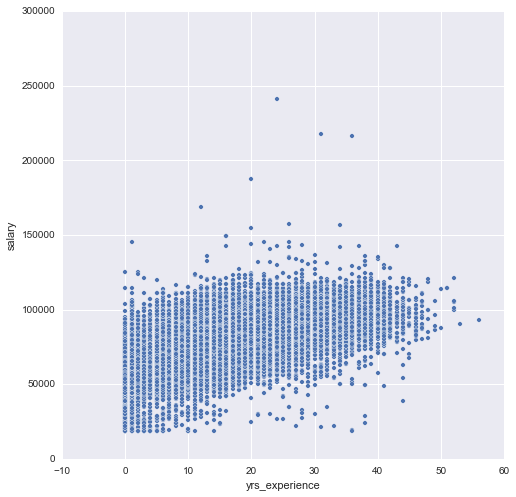

In [347]:
import seaborn as sns
%matplotlib inline
sns.pairplot(modata,x_vars=['yrs_experience'],y_vars='salary',size=7, aspect=1)

In [348]:
sns.distplot(y, rug=True)

KeyboardInterrupt: 

KeyboardInterrupt: 

In [379]:
print len(y)
print len(y[y < 200000])
ynew = y  #[y < 150000]

82940
82937


<class 'pandas.core.series.Series'>


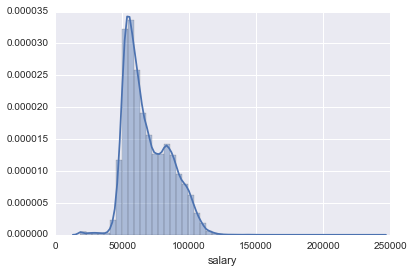

In [380]:
sns.distplot(ynew)
print type(y)

In [407]:
sd = pd.read_csv('sdfile2.txt')

ERROR! Session/line number was not unique in database. History logging moved to new session 109


In [408]:
sd.head()

,Unnamed: 0,yrs_experience,salary,latitude,longitude,m,st,sal.diff,sds
0,1,20,108097,40.857112,-74.132324,85515.818831,12685.065821,22581.181169,1.780139
1,2,19,116747,40.857112,-74.132324,83702.720126,12333.485292,33044.279874,2.679233
2,3,3,61043,40.867243,-74.120725,55149.436823,8004.254857,5893.563177,0.736304
3,4,14,80240,40.251163,-74.653708,73320.533049,12659.516331,6919.466951,0.546582
4,5,31,86845,40.251163,-74.653708,90755.062500,12839.631268,-3910.062500,-0.304531


In [409]:
sd['sdRnd'] = np.floor(sd['sds'])

In [410]:
sd.head()

,Unnamed: 0,yrs_experience,salary,latitude,longitude,m,st,sal.diff,sds,sdRnd
0,1,20,108097,40.857112,-74.132324,85515.818831,12685.065821,22581.181169,1.780139,1
1,2,19,116747,40.857112,-74.132324,83702.720126,12333.485292,33044.279874,2.679233,2
2,3,3,61043,40.867243,-74.120725,55149.436823,8004.254857,5893.563177,0.736304,0
3,4,14,80240,40.251163,-74.653708,73320.533049,12659.516331,6919.466951,0.546582,0
4,5,31,86845,40.251163,-74.653708,90755.062500,12839.631268,-3910.062500,-0.304531,-1


In [411]:
sdrnd = sd.sdRnd

In [413]:
sdrndplt = np.unique(sdrnd, return_counts=True)

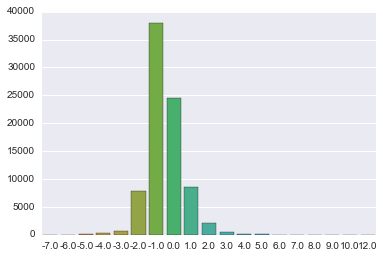

In [414]:
sns.barplot(sdrndplt[0], sdrndplt[1])

In [430]:
print zip(sdrndplt[0], sdrndplt[1])
print (511+169+99+13+14)


[(-7.0, 2), (-6.0, 6), (-5.0, 79), (-4.0, 296), (-3.0, 639), (-2.0, 7935), (-1.0, 37912), (0.0, 24518), (1.0, 8643), (2.0, 2104), (3.0, 511), (4.0, 169), (5.0, 99), (6.0, 13), (7.0, 2), (8.0, 5), (9.0, 3), (10.0, 1), (12.0, 1), (nan, 1), (nan, 1)]
806


In [401]:
sd.sdRnd = sd.sdRnd.astype('category')

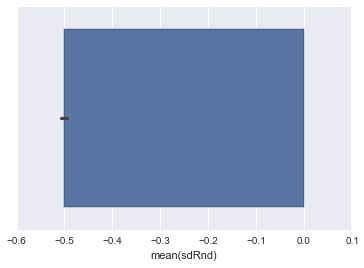

In [402]:
sns.barplot(sd.sdRnd)